
<p align="center">
  <img src="https://images.unsplash.com/photo-1629495025620-26d5f4ada7c2?q=80&w=2896&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" width="1800" height="400">
</p>



<h2 align="center" style="font-weight: bold; color: #e67e22;">
  CSCN8010 Project – Exploring Global Happiness Through Data
</h2>


**Team 8:**
- Ponnu Peter, 9058740
- Madalina Tilvan, 9058215

## Framing the Problem

The goal of this project is to build different machine learning models that cna accurately make predictions and estimate a country's happiness score based on socio-economic and political features that might affect that score.

To adress this problem, we will be exploring the following models:
1. Simple Linear Regression
2. Multiple Linear Regression
3. Random Forest Trees
4. K-Means
5. K-Nearest Neighbors
6. Decision Trees

### About the dataset
The *World Happiness Report* dataset contains features related to happiness, economic, social, and political indicators for different countries across multiple years.

**Number of Instances:** 4,000

**Number of Attributes:** 24 columns

**Timeframe:** 2005-2024

**Columns Overview:**

- `Country`: Name of the country.

- `Year`: The year of the record.

- `Happiness_Score`: A numerical value indicating the happiness level.

- `GDP_per_Capita`: Economic output per person.

- `Social_Support`: Level of social connections and support.

- `Healthy_Life_Expectancy`: Average life expectancy with good health. Life Expectancy at Birth, both sexes (years)

- `Freedom`: Perceived freedom in decision-making.

- `Generosity`: A measure of charitable behavior.

- `Corruption_Perception`: Perception of corruption in society.

- `Unemployment_Rate`: Percentage of unemployed individuals.

- `Education_Index`: A measure of education quality.

- `Population`: Total population of the country.

- `Urbanization_Rate`: Percentage of people living in urban areas. Annual Percentage of Population at Mid-Year Residing in Urban Areas

- `Life_Satisfaction`: A subjective measure of well-being.

- `Public_Trust`: Confidence in public institutions.

- `Mental_Health_Index`: A measure of overall mental health.

- `Income_Inequality`: Economic disparity metric.

- `Public_Health_Expenditure`: Government spending on health.

- `Climate_Index`: A measure of climate conditions.

- `Work_Life_Balance`: An index measuring work-life balance.

- `Internet_Access`: Percentage of population with internet.

- `Crime_Rate`: Reported crime level.

- `Political_Stability`: A measure of political security. and absence of violence/terrorism

- `Employment_Rate`: Percentage of employed individuals.

In [306]:
## import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score

pd.set_option('display.max_columns', None)

In [259]:
happiness_df = pd.read_csv(r'C:\Users\ponnu\Downloads\framework_project\world_happiness_report.csv')
happiness_df.head()

,Country,Year,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Corruption_Perception,Unemployment_Rate,Education_Index,Population,Urbanization_Rate,Life_Satisfaction,Public_Trust,Mental_Health_Index,Income_Inequality,Public_Health_Expenditure,Climate_Index,Work_Life_Balance,Internet_Access,Crime_Rate,Political_Stability,Employment_Rate
0,China,2022,4.39,44984.68,0.53,71.11,0.41,-0.05,0.83,14.98,0.52,1311940760,78.71,8.88,0.34,76.44,46.06,8.92,62.75,8.59,74.40,70.30,0.29,61.38
1,UK,2015,5.49,30814.59,0.93,63.14,0.89,0.04,0.84,19.46,0.83,1194240877,50.87,5.03,0.72,53.38,46.43,4.43,53.11,8.76,91.74,73.32,0.76,80.18
2,Brazil,2009,4.65,39214.84,0.03,62.36,0.01,0.16,0.59,16.68,0.95,731100898,48.75,5.22,0.23,82.40,31.03,3.78,33.30,6.06,71.80,28.99,0.94,72.65
3,France,2019,5.20,30655.75,0.77,78.94,0.98,0.25,0.63,2.64,0.70,1293957314,81.78,5.69,0.68,46.87,57.65,4.43,90.59,6.36,86.16,45.76,0.48,55.14
4,China,2022,7.28,30016.87,0.05,50.33,0.62,0.18,0.92,7.70,0.92,1432971455,82.39,6.33,0.50,60.38,28.54,7.66,59.33,3.00,71.10,65.67,0.12,51.55


## Data Preprocessing

### 1. Detect and handle outliers

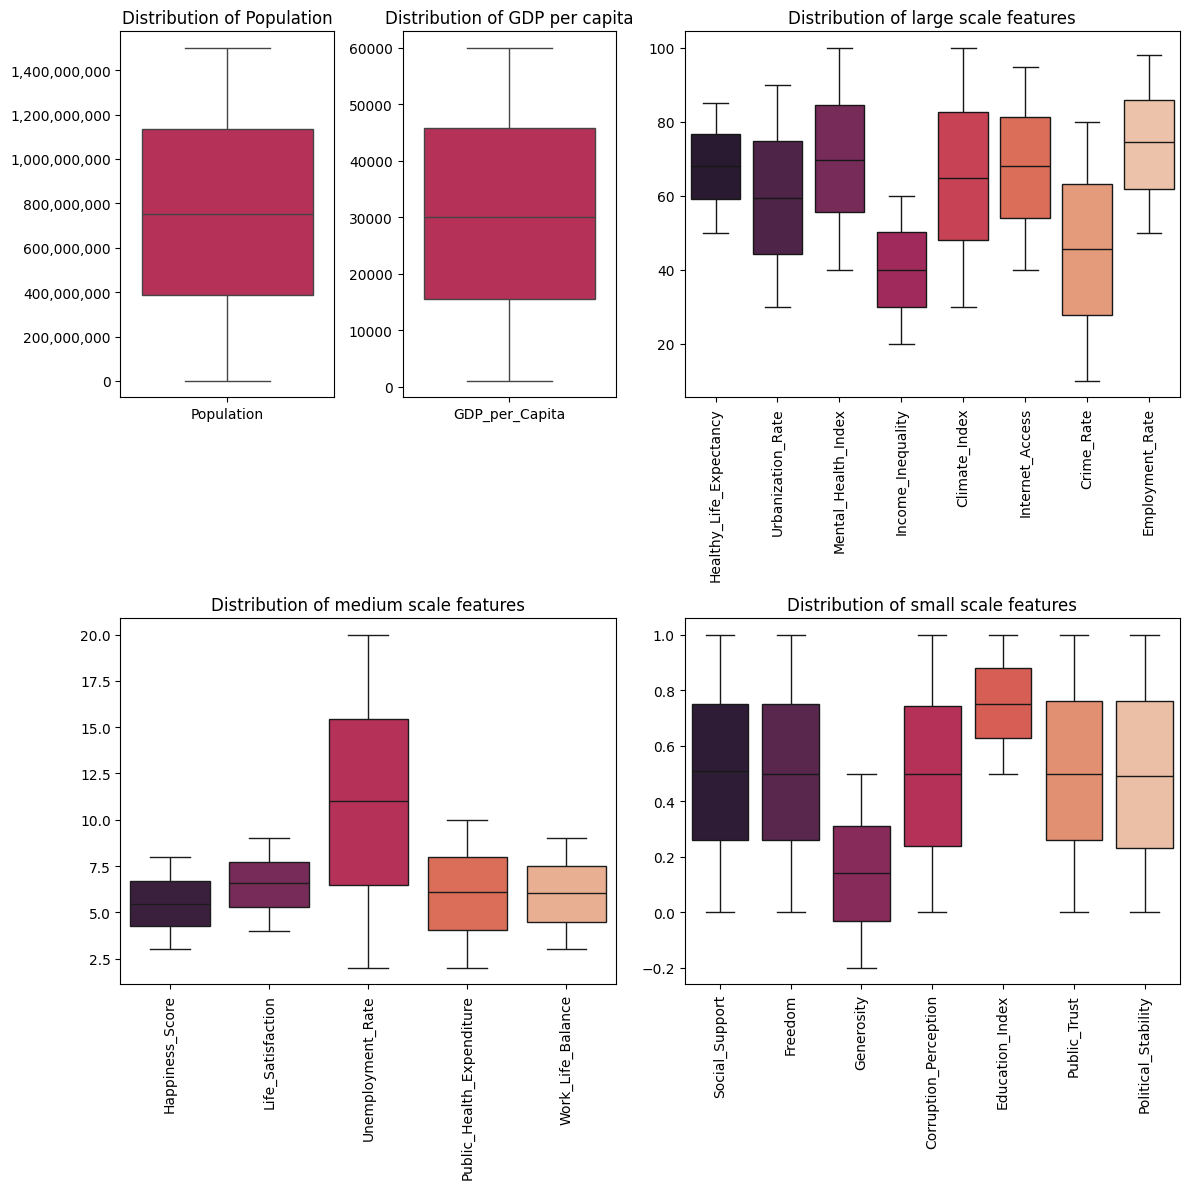

In [260]:
population_col = ['Population']
gdp_col = ['GDP_per_Capita']
small_scale_cols = ['Social_Support', 'Freedom', 'Generosity', 'Corruption_Perception', 'Education_Index','Public_Trust', 'Political_Stability'] 
medium_scale_cols = ['Happiness_Score','Life_Satisfaction','Unemployment_Rate', 'Public_Health_Expenditure', 'Work_Life_Balance']
large_scale_cols = ['Healthy_Life_Expectancy', 'Urbanization_Rate', 'Mental_Health_Index', 'Income_Inequality', 'Climate_Index', 'Internet_Access', 'Crime_Rate', 'Employment_Rate'] 

# Create subplots
fig = plt.figure(figsize=(12, 12))
gs = plt.GridSpec(nrows=2, ncols=4, figure=fig)

# Subplot for population
ax1 = fig.add_subplot(gs[0, 0]) 
sns.boxplot(data=happiness_df[population_col], palette="rocket", ax=ax1)
ax1.set_title("Distribution of Population")
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y):,}'))

# Subplot for GDP per capita
ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(data=happiness_df[gdp_col], palette="rocket", ax=ax2)
ax2.set_title("Distribution of GDP per capita")

# Subplot for large scale features
ax3 = fig.add_subplot(gs[0, 2:4])
sns.boxplot(data=happiness_df[large_scale_cols], palette="rocket", ax=ax3)
ax3.set_title("Distribution of large scale features")
ax3.tick_params(axis='x', rotation=90)

# Subplot for medium scale features
ax4 = fig.add_subplot(gs[1, 0:2])
sns.boxplot(data=happiness_df[medium_scale_cols], palette="rocket", ax=ax4)
ax4.set_title("Distribution of medium scale features")
ax4.tick_params(axis='x', rotation=90)

# Subplot for small scale features
ax5 = fig.add_subplot(gs[1, 2:4])
sns.boxplot(data=happiness_df[small_scale_cols], palette="rocket", ax=ax5)
ax5.set_title("Distribution of small scale features")
ax5.tick_params(axis='x', rotation=90)

# Show the plots
plt.tight_layout()
plt.show()

We have a large distribution of scales for our features, ranging from ***1.4 billion*** for `Population` to ***-0.2*** for `Generosity` column. As for outliers, the data seems to be clean of any extreme values.

### 2. Handle missing values

Our dataset is free of any missing values.

In [261]:
happiness_df.isnull().sum()

Country                      0
Year                         0
Happiness_Score              0
GDP_per_Capita               0
Social_Support               0
Healthy_Life_Expectancy      0
Freedom                      0
Generosity                   0
Corruption_Perception        0
Unemployment_Rate            0
Education_Index              0
Population                   0
Urbanization_Rate            0
Life_Satisfaction            0
Public_Trust                 0
Mental_Health_Index          0
Income_Inequality            0
Public_Health_Expenditure    0
Climate_Index                0
Work_Life_Balance            0
Internet_Access              0
Crime_Rate                   0
Political_Stability          0
Employment_Rate              0
dtype: int64

### 3. Investigate the existence of errors/inconsistencies
Let's check for duplicates, data types of logical inconsistencies that don't make sense in our dataset.


In [262]:
happiness_df.dtypes

Country                       object
Year                           int64
Happiness_Score              float64
GDP_per_Capita               float64
Social_Support               float64
Healthy_Life_Expectancy      float64
Freedom                      float64
Generosity                   float64
Corruption_Perception        float64
Unemployment_Rate            float64
Education_Index              float64
Population                     int64
Urbanization_Rate            float64
Life_Satisfaction            float64
Public_Trust                 float64
Mental_Health_Index          float64
Income_Inequality            float64
Public_Health_Expenditure    float64
Climate_Index                float64
Work_Life_Balance            float64
Internet_Access              float64
Crime_Rate                   float64
Political_Stability          float64
Employment_Rate              float64
dtype: object

In [263]:
happiness_df.describe()

,Year,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Corruption_Perception,Unemployment_Rate,Education_Index,Population,Urbanization_Rate,Life_Satisfaction,Public_Trust,Mental_Health_Index,Income_Inequality,Public_Health_Expenditure,Climate_Index,Work_Life_Balance,Internet_Access,Crime_Rate,Political_Stability,Employment_Rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2014.670750,5.455005,30482.009953,0.505860,67.917605,0.502723,0.143960,0.498920,10.966748,0.750385,7.582057e+08,59.624738,6.516438,0.502812,69.976853,40.002648,6.009270,65.176380,5.987325,67.586327,45.526322,0.494105,74.021450
std,5.724075,1.427370,17216.122032,0.286202,10.172091,0.285219,0.200088,0.288866,5.210712,0.144819,4.318611e+08,17.424544,1.434278,0.289186,17.128536,11.634987,2.291172,19.981357,1.725363,15.769023,20.300069,0.293191,13.906888
min,2005.000000,3.000000,1009.310000,0.000000,50.000000,0.000000,-0.200000,0.000000,2.000000,0.500000,5.718720e+05,30.010000,4.000000,0.000000,40.000000,20.010000,2.010000,30.010000,3.000000,40.010000,10.030000,0.000000,50.000000
25%,2010.000000,4.237500,15425.125000,0.260000,59.177500,0.260000,-0.030000,0.240000,6.450000,0.630000,3.874246e+08,44.367500,5.267500,0.260000,55.580000,29.865000,4.040000,48.170000,4.460000,53.910000,27.840000,0.230000,61.867500
50%,2015.000000,5.430000,29991.255000,0.510000,68.015000,0.500000,0.140000,0.500000,10.995000,0.750000,7.507210e+08,59.485000,6.570000,0.500000,69.650000,40.015000,6.070000,64.755000,6.020000,68.015000,45.760000,0.490000,74.475000
75%,2020.000000,6.662500,45763.085000,0.750000,76.690000,0.750000,0.310000,0.742500,15.450000,0.880000,1.134393e+09,74.987500,7.720000,0.760000,84.582500,50.187500,8.010000,82.652500,7.490000,81.332500,63.197500,0.760000,85.912500
max,2024.000000,8.000000,59980.720000,1.000000,85.000000,1.000000,0.500000,1.000000,19.990000,1.000000,1.499708e+09,90.000000,9.000000,1.000000,100.000000,59.970000,10.000000,99.990000,9.000000,94.990000,79.990000,1.000000,98.000000


The happiness dataset contains several features with different types of scales, as we observed earlier. These scales range from percentages and proportions (values between 0 and 1) to rates or large numerical values. Some features (`Social_Support`, `Freedom`, `Corruption_Perception`, `Public_Trust`, `Political_Stability`) are between 0 and 1, suggesting they might represent percentages or ratios. In contrast, other features have values ranging from 0 to 100 or even larger scales (in millions or billions).

This inconsistency in scales needs to be adressed to prevent models from being biased towards features with larger scales. In the next section, we will standardize and normalize the data to bring all the features to more comparable scales.

### 4. Feature engineering

Let's create a new column by combining `Public_Health_Epxenditure` and `Mental_Health_Index`. This new feature will help capture if investments in public health systems affect the mental health in each country. This will show if happiness is influenced by the prioritization of public mental health.

In [264]:
happiness_df['Mental_Health_Expenditure_Factor'] = happiness_df['Public_Health_Expenditure'] * happiness_df['Mental_Health_Index']

### 5. Normalize numerical features

I'll use Z-score normalization to ensure that all features have the same scale.


In [265]:
numerical_features = happiness_df.iloc[:, 2:]

for col in numerical_features.columns:
    scaler = StandardScaler()
    numerical_features[col] = scaler.fit_transform(numerical_features[[col]])

print("Numerical features summary statistics:")
display(numerical_features.describe())

print("\nFirst 5 rows for numerical features:")
display(numerical_features.head())


Numerical features summary statistics:


,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Corruption_Perception,Unemployment_Rate,Education_Index,Population,Urbanization_Rate,Life_Satisfaction,Public_Trust,Mental_Health_Index,Income_Inequality,Public_Health_Expenditure,Climate_Index,Work_Life_Balance,Internet_Access,Crime_Rate,Political_Stability,Employment_Rate,Mental_Health_Expenditure_Factor
count,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03
mean,6.989964e-16,-3.197442e-17,8.881784e-17,5.133671e-16,-2.522427e-16,-2.664535e-17,-1.172396e-16,-3.996803e-16,2.158274e-16,-7.416290e-17,-1.108003e-16,-2.331468e-16,1.287859e-17,-4.014566e-16,-1.589839e-16,-3.428369e-16,2.611245e-16,-6.430412e-16,2.486900e-16,3.552714e-17,-5.506706e-17,-1.101341e-16,1.905143e-16
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-1.720165e+00,-1.712138e+00,-1.767716e+00,-1.761668e+00,-1.762804e+00,-1.719257e+00,-1.727385e+00,-1.721045e+00,-1.729163e+00,-1.754565e+00,-1.699811e+00,-1.754717e+00,-1.738933e+00,-1.750331e+00,-1.718536e+00,-1.745731e+00,-1.760180e+00,-1.731635e+00,-1.748984e+00,-1.748800e+00,-1.685475e+00,-1.727522e+00,-1.735922e+00
25%,-8.530775e-01,-8.746899e-01,-8.591520e-01,-8.593315e-01,-8.511100e-01,-8.695254e-01,-8.964453e-01,-8.669281e-01,-8.313809e-01,-8.586731e-01,-8.757271e-01,-8.708866e-01,-8.397458e-01,-8.406236e-01,-8.714161e-01,-8.596109e-01,-8.512188e-01,-8.853302e-01,-8.673991e-01,-8.713534e-01,-9.009062e-01,-8.740611e-01,-8.127382e-01
50%,-1.752042e-02,-2.850911e-02,1.446713e-02,9.575925e-03,-9.546486e-03,-1.979375e-02,3.739228e-03,5.422682e-03,-2.658817e-03,-1.733345e-02,-8.020581e-03,3.734924e-02,-9.726786e-03,-1.908472e-02,1.061801e-03,2.650940e-02,-2.109129e-02,1.894041e-02,2.718787e-02,1.151261e-02,-1.400284e-02,3.261741e-02,-1.198029e-01
75%,8.460637e-01,8.877136e-01,8.531415e-01,8.625062e-01,8.670822e-01,8.299379e-01,8.433344e-01,8.604992e-01,8.951235e-01,8.711920e-01,8.817839e-01,8.392465e-01,8.894605e-01,8.528151e-01,8.754738e-01,8.733436e-01,8.747306e-01,8.710415e-01,8.718290e-01,8.706072e-01,9.070122e-01,8.551544e-01,6.611923e-01
max,1.783219e+00,1.713649e+00,1.726761e+00,1.679550e+00,1.743711e+00,1.779638e+00,1.734863e+00,1.731890e+00,1.723846e+00,1.717207e+00,1.743464e+00,1.731793e+00,1.719480e+00,1.753034e+00,1.716362e+00,1.742003e+00,1.742523e+00,1.746329e+00,1.738034e+00,1.697925e+00,1.725692e+00,1.724437e+00,2.903652e+00



First 5 rows for numerical features:


,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Corruption_Perception,Unemployment_Rate,Education_Index,Population,Urbanization_Rate,Life_Satisfaction,Public_Trust,Mental_Health_Index,Income_Inequality,Public_Health_Expenditure,Climate_Index,Work_Life_Balance,Internet_Access,Crime_Rate,Political_Stability,Employment_Rate,Mental_Health_Expenditure_Factor
0,-0.746224,0.842494,0.084357,0.313878,-0.325133,-0.969494,1.146281,0.770289,-1.591043,1.282367,1.095446,1.648117,-0.563073,0.377379,0.520680,1.270570,-0.121447,1.508668,0.432146,1.220527,-0.696236,-0.909120,1.334799
1,0.024520,0.019320,1.482147,-0.469736,1.357994,-0.519636,1.180904,1.630164,0.549823,1.009791,-0.502500,-1.036496,0.751124,-0.969080,0.552485,-0.689371,-0.603957,1.607211,1.531908,1.369313,0.907012,0.442897,-0.943494
2,-0.564048,0.507311,-1.662882,-0.546426,-1.727739,0.080175,0.315342,1.096581,1.378545,-0.062771,-0.624183,-0.904008,-0.943498,0.725380,-0.771275,-0.973104,-1.595506,0.042127,0.267245,-0.814696,1.521022,-0.098629,-0.559839
3,-0.178676,0.010093,0.923031,1.083727,1.673581,0.530033,0.453831,-1.598206,-0.347960,1.240720,1.271656,-0.576276,0.612788,-1.349195,1.516938,-0.689371,1.272026,0.216025,1.178005,0.011513,-0.048115,-1.357875,-1.091021
4,1.278732,-0.027021,-1.592992,-1.729222,0.411235,0.180143,1.457883,-0.627008,1.171364,1.562655,1.306669,-0.130003,-0.009727,-0.560355,-0.985311,0.720564,-0.292628,-1.731635,0.222849,0.992420,-1.276135,-1.616052,0.212798


In [266]:
happiness_merged = pd.concat([happiness_df[['Country', 'Year']], numerical_features], axis = 1)
# Normalized dataset 
happiness_clean = happiness_df.copy()
happiness_merged.isna().sum()


Country                             0
Year                                0
Happiness_Score                     0
GDP_per_Capita                      0
Social_Support                      0
Healthy_Life_Expectancy             0
Freedom                             0
Generosity                          0
Corruption_Perception               0
Unemployment_Rate                   0
Education_Index                     0
Population                          0
Urbanization_Rate                   0
Life_Satisfaction                   0
Public_Trust                        0
Mental_Health_Index                 0
Income_Inequality                   0
Public_Health_Expenditure           0
Climate_Index                       0
Work_Life_Balance                   0
Internet_Access                     0
Crime_Rate                          0
Political_Stability                 0
Employment_Rate                     0
Mental_Health_Expenditure_Factor    0
dtype: int64

### 6. Encode categorical variables


In [267]:
countries_encoded = pd.get_dummies(happiness_merged['Country'], sparse = True, dtype='int')
countries_encoded

,Australia,Brazil,Canada,China,France,Germany,India,South Africa,UK,USA
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,1,0,0
3996,0,0,0,0,0,0,1,0,0,0
3997,0,0,0,0,0,0,0,1,0,0
3998,0,1,0,0,0,0,0,0,0,0


Now, let's merge it with our dataset.

In [268]:
happiness_merged = pd.concat([happiness_merged, countries_encoded], axis =1)
happiness_merged = happiness_merged.drop(columns='Country')
happiness_merged.head()

,Year,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Corruption_Perception,Unemployment_Rate,Education_Index,Population,Urbanization_Rate,Life_Satisfaction,Public_Trust,Mental_Health_Index,Income_Inequality,Public_Health_Expenditure,Climate_Index,Work_Life_Balance,Internet_Access,Crime_Rate,Political_Stability,Employment_Rate,Mental_Health_Expenditure_Factor,Australia,Brazil,Canada,China,France,Germany,India,South Africa,UK,USA
0,2022,-0.746224,0.842494,0.084357,0.313878,-0.325133,-0.969494,1.146281,0.770289,-1.591043,1.282367,1.095446,1.648117,-0.563073,0.377379,0.520680,1.270570,-0.121447,1.508668,0.432146,1.220527,-0.696236,-0.909120,1.334799,0,0,0,1,0,0,0,0,0,0
1,2015,0.024520,0.019320,1.482147,-0.469736,1.357994,-0.519636,1.180904,1.630164,0.549823,1.009791,-0.502500,-1.036496,0.751124,-0.969080,0.552485,-0.689371,-0.603957,1.607211,1.531908,1.369313,0.907012,0.442897,-0.943494,0,0,0,0,0,0,0,0,1,0
2,2009,-0.564048,0.507311,-1.662882,-0.546426,-1.727739,0.080175,0.315342,1.096581,1.378545,-0.062771,-0.624183,-0.904008,-0.943498,0.725380,-0.771275,-0.973104,-1.595506,0.042127,0.267245,-0.814696,1.521022,-0.098629,-0.559839,0,1,0,0,0,0,0,0,0,0
3,2019,-0.178676,0.010093,0.923031,1.083727,1.673581,0.530033,0.453831,-1.598206,-0.347960,1.240720,1.271656,-0.576276,0.612788,-1.349195,1.516938,-0.689371,1.272026,0.216025,1.178005,0.011513,-0.048115,-1.357875,-1.091021,0,0,0,0,1,0,0,0,0,0
4,2022,1.278732,-0.027021,-1.592992,-1.729222,0.411235,0.180143,1.457883,-0.627008,1.171364,1.562655,1.306669,-0.130003,-0.009727,-0.560355,-0.985311,0.720564,-0.292628,-1.731635,0.222849,0.992420,-1.276135,-1.616052,0.212798,0,0,0,1,0,0,0,0,0,0


## Principal Component Analysis (PCA)

In [269]:
def perform_pca_analysis(dataset):
    # Apply PCA (keep all components)
    pca = PCA(n_components=len(dataset.columns))
    pca.fit(dataset)

    # Get explained variance
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    # Find the minimum number of components that explain at least 90% variance
    num_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

    # Plot explained variance
    plt.figure(figsize=(18, 8))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='b', label="Explained Variance")
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r', label="Cumulative Explained Variance")
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Variance Explained')
    plt.title('Explained and Cumulative Variance by Principal Components')
    plt.xticks(range(1, len(explained_variance) + 1))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Create a DataFrame to show explained variance
    explained_variance_df = pd.DataFrame({
        "Principal Component": [f"PC{i+1}" for i in range(len(explained_variance))],
        "Explained Variance Ratio": explained_variance,
        "Cumulative Variance": cumulative_variance
    })

    # Print explained variance DataFrame
    print("\nExplained Variance Analysis:")
    print(explained_variance_df)

    # Get PCA component vectors (eigenvectors)
    pca_components_df = pd.DataFrame(pca.components_, columns=dataset.columns, index=[f"PC{i+1}" for i in range(len(dataset.columns))])

    # Print PCA component vectors
    print("\nPCA Component Vectors (Eigenvectors):")
    print(pca_components_df)
    return num_components_90 

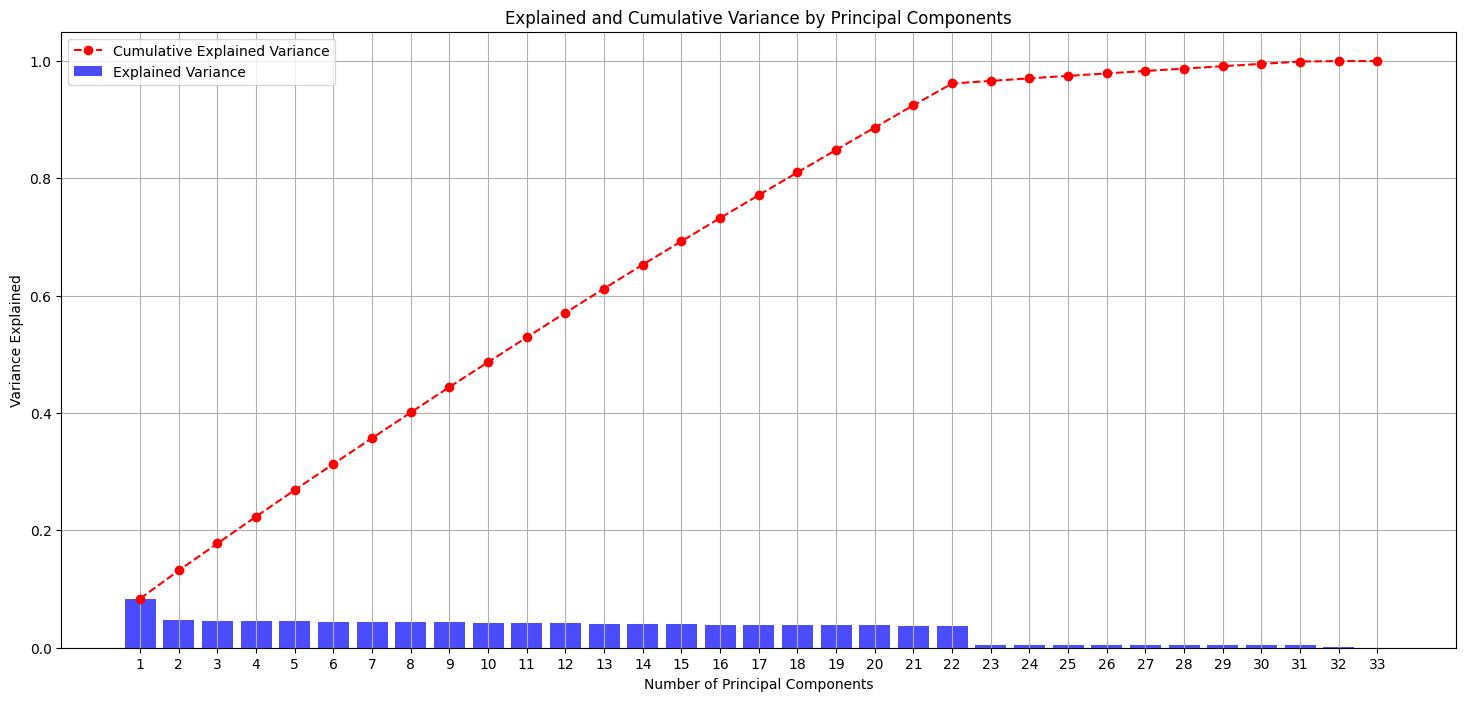


Explained Variance Analysis:
   Principal Component  Explained Variance Ratio  Cumulative Variance
0                  PC1                  0.083718             0.083718
1                  PC2                  0.047939             0.131657
2                  PC3                  0.046150             0.177807
3                  PC4                  0.045824             0.223631
4                  PC5                  0.045151             0.268783
5                  PC6                  0.044690             0.313473
6                  PC7                  0.043899             0.357372
7                  PC8                  0.043686             0.401058
8                  PC9                  0.043335             0.444392
9                 PC10                  0.042395             0.486787
10                PC11                  0.042338             0.529125
11                PC12                  0.041934             0.571059
12                PC13                  0.041157            

In [270]:
num_pcs = perform_pca_analysis(happiness_merged.drop(columns=['Year']))
print(f"\nMinimum number of PCA components needed for 90% variance: {num_pcs}")

When performing PCA analysis on whole cleaned dataset, we need at least `21` PCA components to explain `90%` of variance.

## Exploratory Data Analysis (EDA)

#### Correlation Heatmap

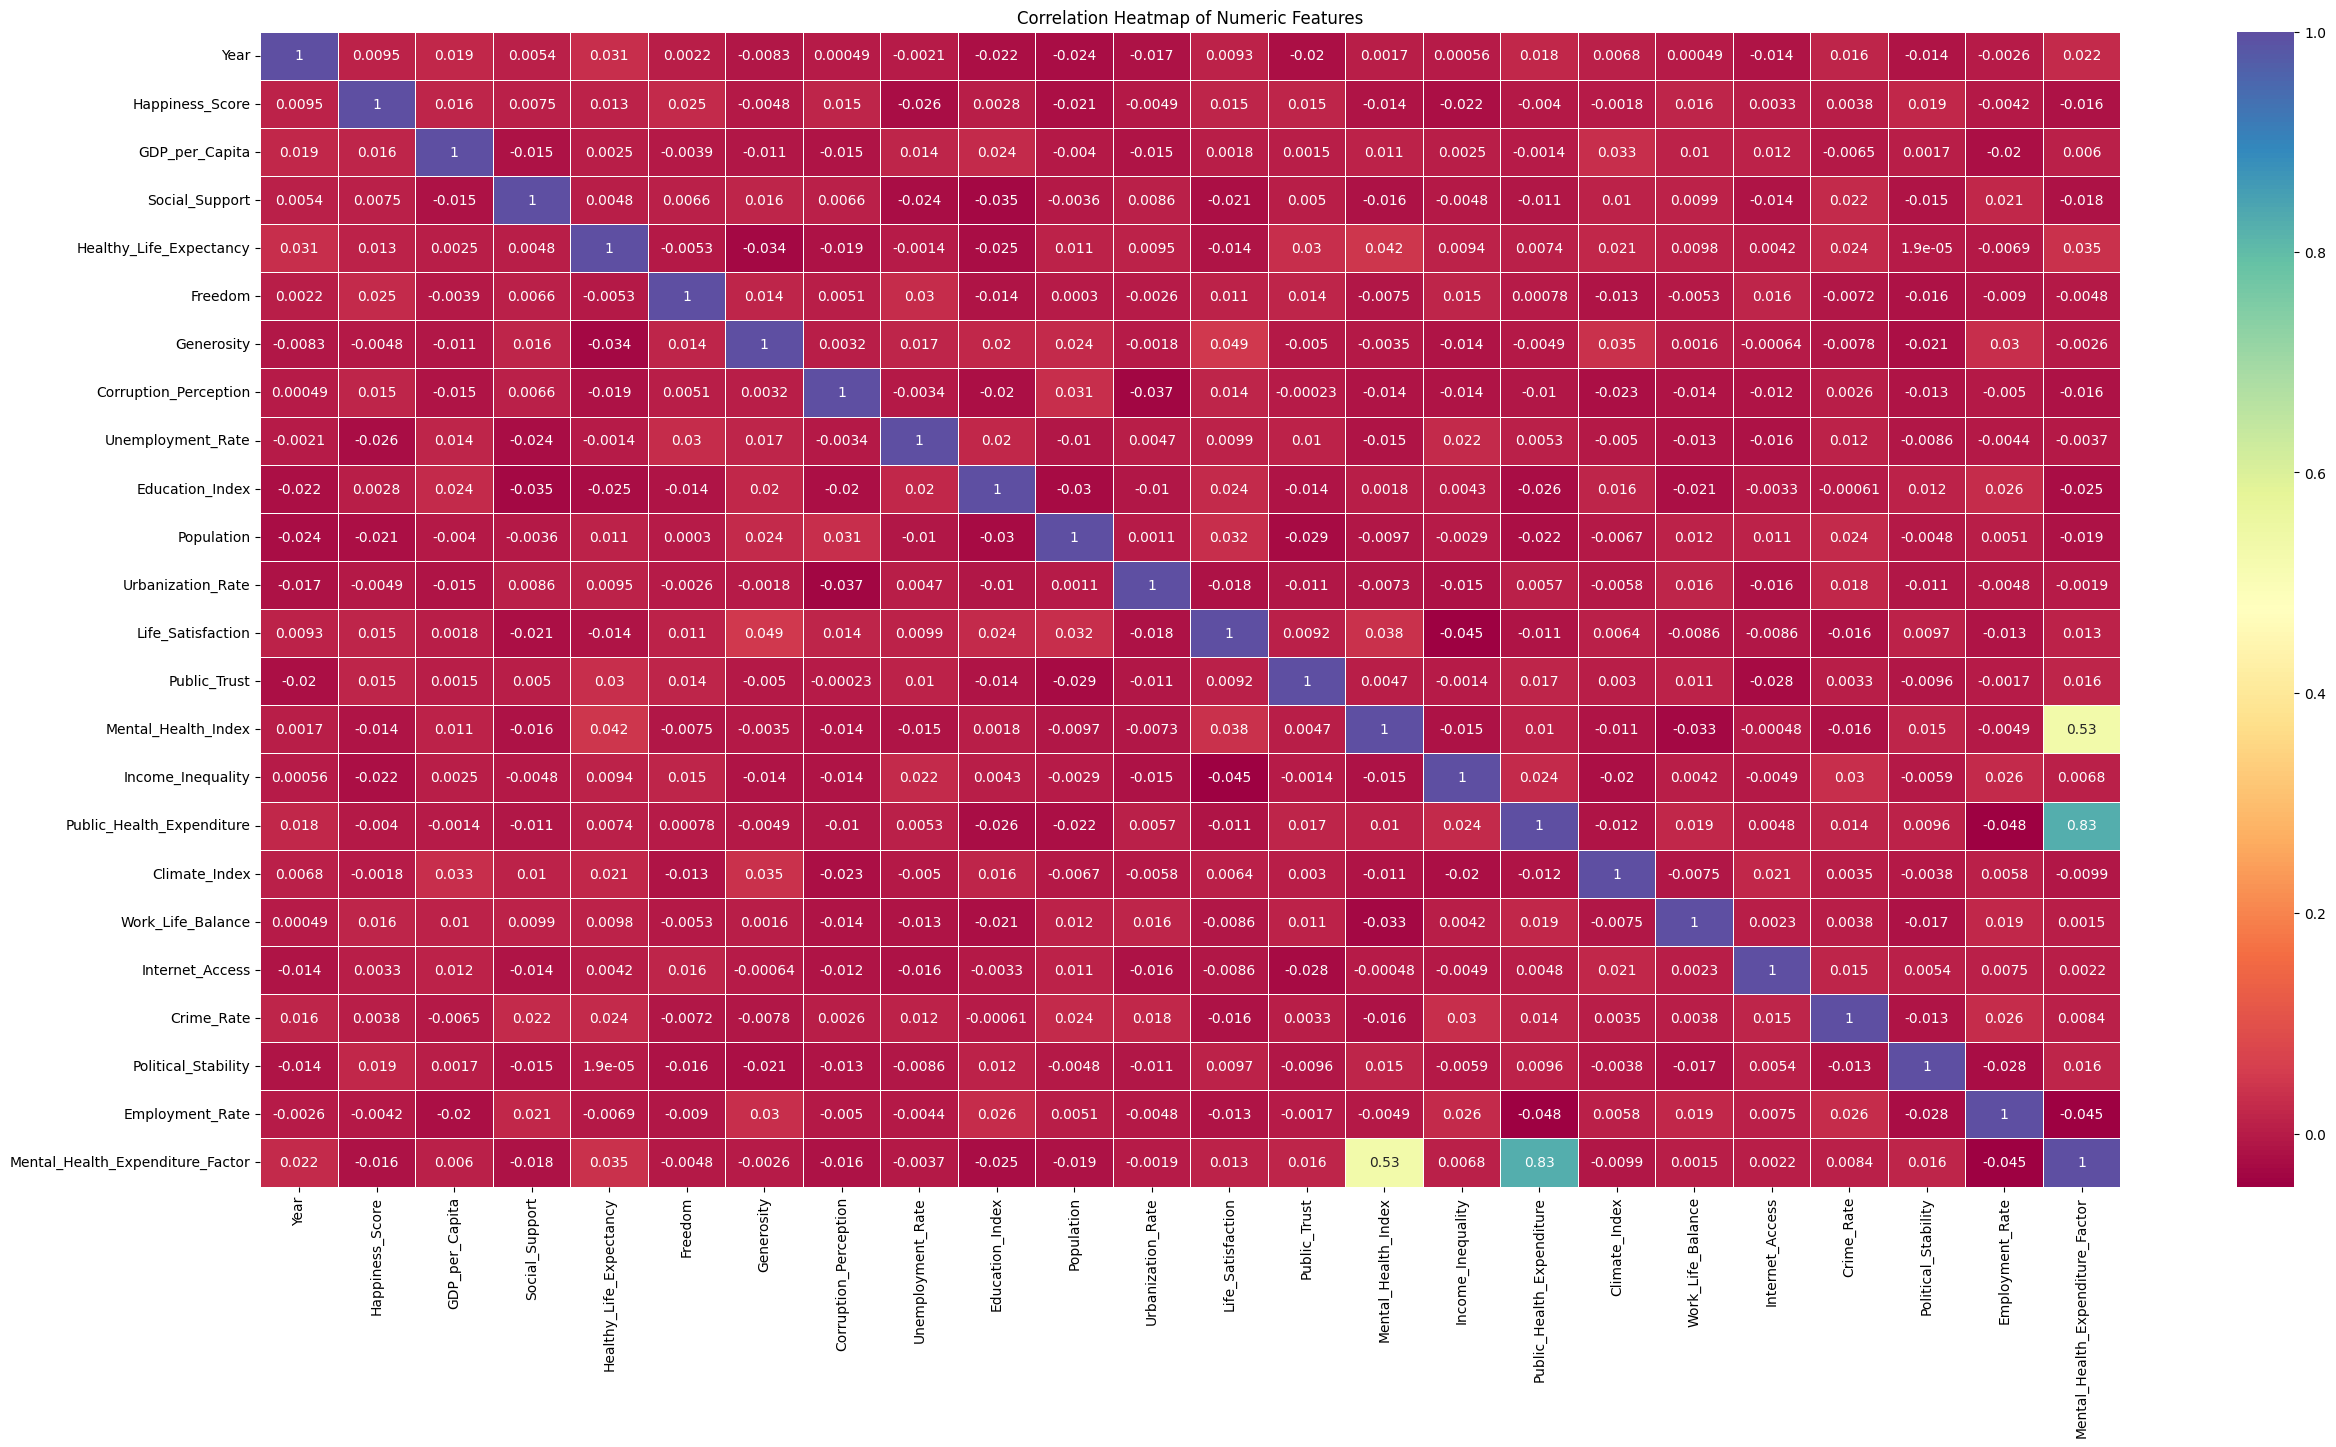

In [271]:
plt.figure(figsize=(30, 15))
sns.heatmap(happiness_clean.corr(numeric_only=True), annot=True, cmap='Spectral', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


This heatmap shows how different numeric features are related. Most features have weak correlations with the happiness score, meaning they don’t strongly affect it on their own. The strongest relationship is between public health spending and mental health spending, showing they tend to increase together.

#### Global Happiness Score Trend(2005–2024)

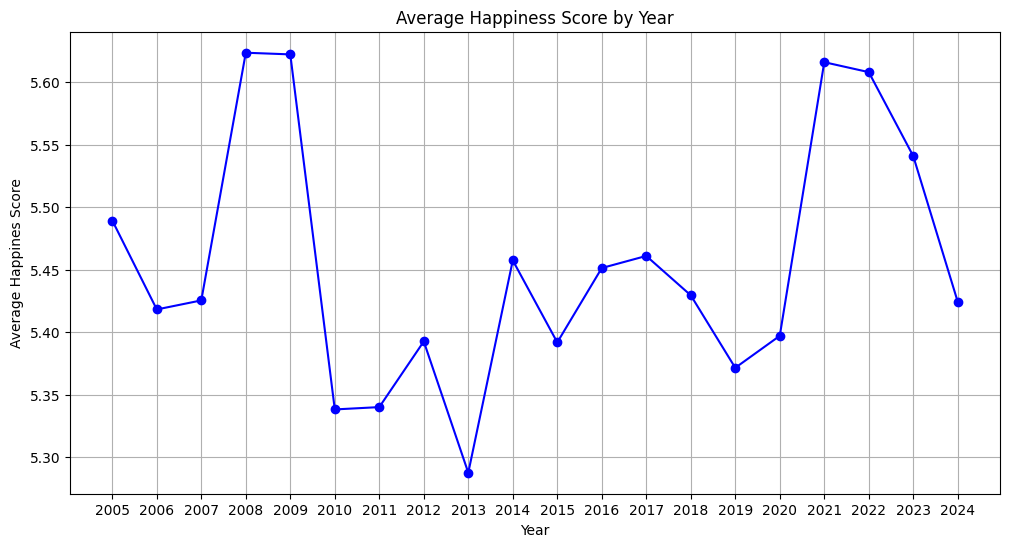

In [383]:
happiness_score=happiness_clean.groupby('Year')['Happiness_Score'].mean().reset_index()
happiness_score.head(2)
#plot trends
plt.figure(figsize=(12,6))
plt.plot(happiness_score['Year'], happiness_score['Happiness_Score'], marker='o', color='blue')
plt.title('Average Happiness Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Happines Score')
plt.xticks(happiness_score['Year'].unique())
plt.grid(True)
plt.show()

This line graph displays the average happiness score globally from 2005 to 2024. The scores fluctuate modestly over time, with noticeable peaks in 2009–2010 and 2021–2022. A dip is observed in 2013, and a decline appears again by 2024.

#### Top 5 Happiest Countries (Latest Year)

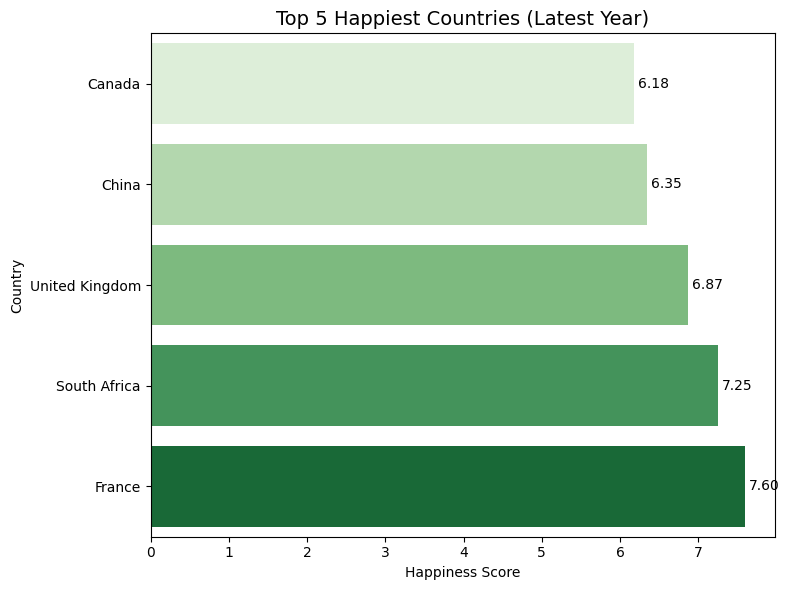

In [384]:
# Filter latest data and standardize country names
latest_year = happiness_clean['Year'].max()
happiness_clean['Country'] = happiness_clean['Country'].replace({'UK': 'United Kingdom', 'USA': 'United States'})
latest_data = happiness_clean[happiness_clean['Year'] == latest_year].copy()

# Drop duplicates and sort top 5
latest_data_unique = latest_data.drop_duplicates(subset='Country')
top_5 = latest_data_unique.sort_values(by='Happiness_Score', ascending=False).head(5).sort_values('Happiness_Score')

# Plot top 5 happiest countries
top_colors = sns.color_palette("Greens", n_colors=5)
plt.figure(figsize=(8, 6))
sns.barplot(x='Happiness_Score', y='Country', data=top_5, palette=top_colors)
plt.title('Top 5 Happiest Countries (Latest Year)', fontsize=14)
plt.xlabel('Happiness Score')
plt.ylabel('Country')

# Add value labels
for i, v in enumerate(top_5['Happiness_Score']):
    plt.text(v + 0.05, i, f'{v:.2f}', va='center')

plt.tight_layout()
plt.show()


This bar chart displays the top 5 happiest countries based on the latest year's data. France leads with the highest happiness score, followed by South Africa, the United Kingdom, China, and Canada. The green gradient visually represents increasing happiness levels, offering a clear and effective comparison across these nations.

#### Global Happiness Overview for 10 Countries

In [ ]:

#  Drop duplicate countries
latest_data_unique1 = latest_data.drop_duplicates(subset='Country')
#  Add Latitude and Longitude
coordinates = {
    'China': (35.8617, 104.1954),
    'Brazil': (-14.2350, -51.9253),
    'France': (46.6034, 1.8883),
    'South Africa': (-30.5595, 22.9375),
    'Germany': (51.1657, 10.4515),
    'India': (20.5937, 78.9629),
    'Canada': (56.1304, -106.3468),
    'United States': (37.0902, -95.7129),
    'Australia': (-25.2744, 133.7751),
    'United Kingdom': (55.3781, -3.4360)  
}

# Map coordinates
latest_data_unique1['Latitude'] = latest_data_unique1['Country'].map(lambda x: coordinates.get(x, (0, 0))[0])
latest_data_unique1['Longitude'] = latest_data_unique1['Country'].map(lambda x: coordinates.get(x, (0, 0))[1])

# Add hover text
latest_data_unique1['Hover'] = latest_data_unique1['Country'] + ': ' + latest_data_unique1['Happiness_Score'].astype(str)
min_score = latest_data_unique1['Happiness_Score'].min()
max_score = latest_data_unique1['Happiness_Score'].max()

# Create choropleth map
fig = px.choropleth(
    latest_data_unique1,
    locations='Country',
    locationmode='country names',
    color='Happiness_Score',
    hover_name='Hover',
    color_continuous_scale='RdYlGn',
    range_color=(4,8),
    title='Happiness Score by Country (Latest Year)'
)

# Add labels on map
for _, row in latest_data_unique1.iterrows():
    fig.add_trace(go.Scattergeo(
        lon=[row['Longitude']],
        lat=[row['Latitude']],
        text=row['Country'],
        mode='text',
        textfont=dict(color='black', size=12),
        showlegend=False
    ))

# Final layout
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    margin={"r": 0, "t": 40, "l": 0, "b": 0}
)

fig.show()

This choropleth map visualizes the variation in happiness scores across countries for the latest year in the dataset. Darker green regions indicate higher happiness levels, while redder areas represent lower scores.

## Fitting Models

### Regression Models

#### 1. Linear Regression

In [276]:
y = happiness_clean['Happiness_Score']
#  Drop categorical + target
X_all = happiness_clean.drop(columns=['Happiness_Score', 'Country', 'Year'])
# Get numeric features only
features = [col for col in X_all.columns if X_all[col].dtype in ['float64', 'int64']]
# Store results
results = []
predictions = {}
# Apply SLR for each feature
for feature in features:
    X = happiness_clean[[feature]]
    y = happiness_clean['Happiness_Score']

    # Drop missing values
    Xy = pd.concat([X, y], axis=1).dropna()
    X = Xy[[feature]]
    y = Xy['Happiness_Score']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[feature] = (y_test, y_pred)


- Model Performance Evaluation

In [277]:
# Evaluate R² for each feature
for feature, (y_test, y_pred) in predictions.items():
    r2 = r2_score(y_test, y_pred)
    results.append((feature, r2))
    print(f"{feature} → R²: {r2:.4f}")

GDP_per_Capita → R²: -0.0015
Social_Support → R²: -0.0002
Healthy_Life_Expectancy → R²: -0.0017
Freedom → R²: 0.0014
Generosity → R²: -0.0019
Corruption_Perception → R²: -0.0008
Unemployment_Rate → R²: 0.0015
Education_Index → R²: -0.0016
Population → R²: -0.0007
Urbanization_Rate → R²: -0.0003
Life_Satisfaction → R²: -0.0034
Public_Trust → R²: -0.0006
Mental_Health_Index → R²: -0.0007
Income_Inequality → R²: 0.0001
Public_Health_Expenditure → R²: -0.0038
Climate_Index → R²: -0.0003
Work_Life_Balance → R²: 0.0004
Internet_Access → R²: -0.0005
Crime_Rate → R²: -0.0003
Political_Stability → R²: -0.0000
Employment_Rate → R²: -0.0005
Mental_Health_Expenditure_Factor → R²: -0.0005


The single linear regression analysis across individual features yielded extremely low R² scores, all close to zero or negative. This indicates that none of the features alone, including GDP per Capita, Social Support, Freedom, or Education Index , meaningfully explain the variance in happiness scores. The model suggests no strong linear relationship exists between any single feature and the target variable.

#### 2. Multiple Linear Regression

In [278]:
mlr_features = [
    'Freedom',
    'Unemployment_Rate',
    'Work_Life_Balance',
    'Income_Inequality',
    'Education_Index',
    'Social_Support',
    'GDP_per_Capita'
]
y=happiness_merged['Happiness_Score']
X=happiness_merged[mlr_features]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression Model
model_mlr=LinearRegression()
model_mlr.fit(X_train, y_train)
y_pred_mlr=model_mlr.predict(X_test)


- Model Performance Evaluation

In [279]:
# Evaluate
print(f" R² Score: {r2_score(y_test, y_pred_mlr):.4f}")
print(f" Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_mlr):.4f}")
print(f" Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_mlr):.4f}")

 R² Score: 0.0020
 Mean Absolute Error (MAE): 0.8599
 Mean Squared Error (MSE): 0.9890


The Multiple Linear Regression (MLR) model showed very limited predictive power, with an R² Score of 0.0020, meaning it explains almost none of the variance in happiness scores. The MAE of 0.8599 and MSE of 0.9890 indicate the model's predictions are not highly accurate and contain considerable error.

#### 3. Random Forest Regression

In [318]:
#Random Forest Regressor model
y=happiness_merged['Happiness_Score']
x= happiness_merged.drop(columns='Happiness_Score')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_rf=RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf=model_rf.predict(X_test)


- Model Performance Evaluation

In [319]:
#Evaluate
print(f" R² Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f" Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rf):.4f}")
print(f" Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf):.4f}")

 R² Score: -0.0283
 Mean Absolute Error (MAE): 0.8908
 Mean Squared Error (MSE): 1.0540


The Random Forest Regressor performed poorly, with an R² Score of -0.0213. The MAE of 0.88 and MSE of 1.05 suggest large average prediction errors, highlighting that the model fails to accurately capture the relationship between features and happiness score.

- Residual Plot

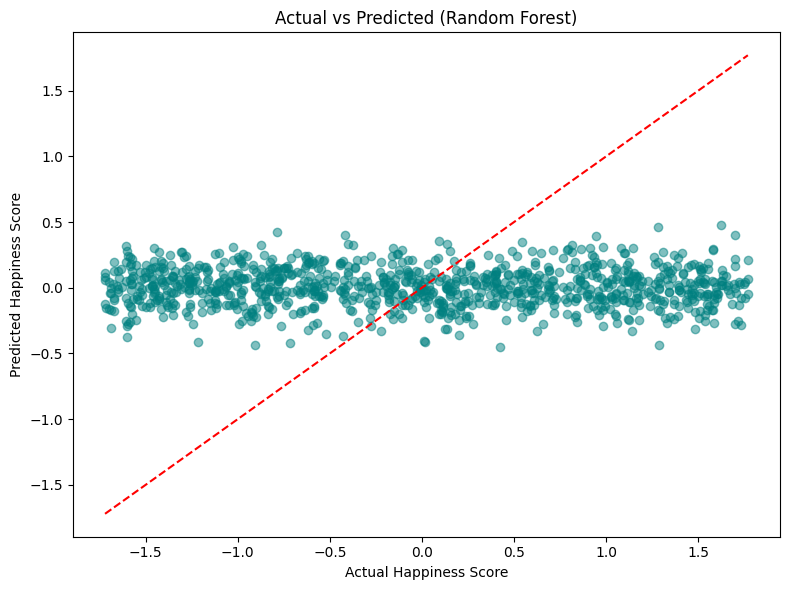

In [320]:
#residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted (Random Forest)')
plt.tight_layout()
plt.show()

The scatter plot shows predicted vs. actual happiness scores using a Random Forest regressor. Most predictions cluster around zero, indicating limited variance capture. The spread suggests that the model struggles to predict extreme values accurately

### Classification Models

#### 3. Random Forest 

In [309]:
from imblearn.over_sampling import SMOTE
#Convert Happiness Score to Categories

# Step 1: Convert Happiness Score to Binary
def binary_happiness(score):
    if score < -0.5:
        return 0  # Unhappy
    else:
        return 1  # Happy

happiness_merged['Happiness_Binary'] = happiness_merged['Happiness_Score'].apply(binary_happiness)

X = happiness_merged.drop(columns=['Happiness_Score', 'Happiness_Binary'])
X = pd.get_dummies(X, drop_first=True)  
y = happiness_merged['Happiness_Binary']

#Applying SMOTE for Class Balancing
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, stratify=y_bal, random_state=42)

#Train model
model_rfc = RandomForestClassifier(n_estimators=100, random_state=42)
model_rfc.fit(X_train, y_train)

#Predict
y_pred_rfc = model_rfc.predict(X_test)



- Model Performance Evaluation


 Accuracy: 0.7057
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.59      0.67       644
           1       0.67      0.82      0.74       644

    accuracy                           0.71      1288
   macro avg       0.72      0.71      0.70      1288
weighted avg       0.72      0.71      0.70      1288



<Figure size 600x400 with 0 Axes>

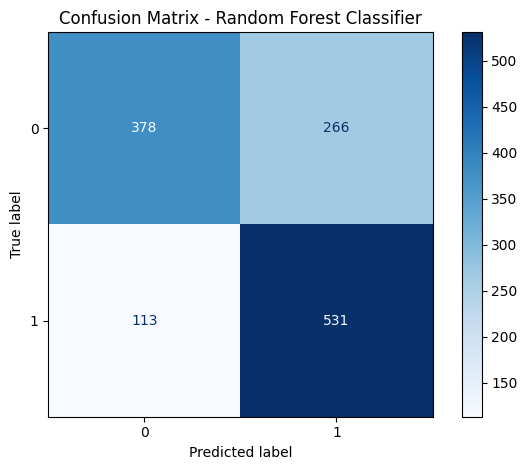

In [316]:
accuracy = accuracy_score(y_test, y_pred_rfc)
print(f" Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rfc))

#  Confusion matrix
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_estimator(model_rfc, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Random Forest Classifier")
plt.tight_layout()
plt.show()


#### Interpretation
Overall Accuracy: 0.71 ->The model achieved a prediction accuracy of 71.25% on the test set.

- Class 0 (Unhappy):

Precision: 0.77 → Among the samples predicted as 'Unhappy', 77% are actually unhappy.

Recall: 0.59 → It only catches 59% of the truly unhappy people.

The model misses quite a few unhappy cases, but those it does predict are mostly correct.

- Class 1 (Happy):

Precision: 0.67 → Among the samples predicted as 'happy', 67% are actually unhappy.

Recall: 0.82 → Very strong at detecting Happy individuals.

The model is better at catching Happy people than Unhappy ones.

The Random Forest Classifier achieved an overall accuracy of 71%.It shows good balance in precision and recall across both classes.However, the model still tends to favor the Happy class slightly, with higher recall (82%) compared to the Unhappy class (59%).


- ROC curve

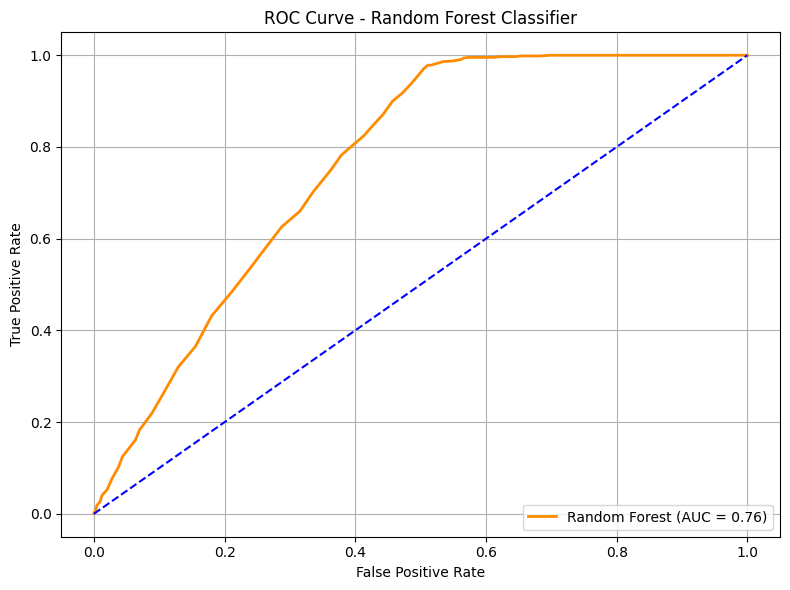

In [314]:
#predicted probabilities for class 1 (Happy)
y_probs = model_rfc.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})', color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='blue') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


The ROC curve shows the trade-off between the true positive rate and the false positive rate across thresholds. With an AUC of 0.76, the Random Forest Classifier demonstrates good discriminative ability in distinguishing between Happy and Unhappy individuals.

#### 4. Decision Trees

### Clustering Models

#### 5. K-Means

#### 6. K-Nearest Neighbors (KNN)

## Conclusions